## Generating Ames Neighborhood Information

This notebook explores information on the Ames Neighborhoods. To do so, we first merge the Ames_Housing_Price_Data.csv set (containing target feature SalePrice, PID, Neighborhood) with Ames_Real_Estate_Data.csv (containing property address, MapRefNo). Using geopy, we can find the long-lat coordinates of the houses based on property address. To save time, we save the generated lat and long to a csv file together with neighborhood score (an engineered feature) to use with the main dataframe of house attributes to train our model.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

housing = pd.read_csv('data/Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col=0)
mergedf = pd.merge(housing, real_estate, left_on='PID', right_on='MapRefNo')
mergedf

,PID,GrLivArea,SalePrice_x,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,436,NaN,HAYWARD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,320,S,2ND,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,1524,NaN,DOUGLAS,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,1021,NaN,RIDGEWOOD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2599,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,3619,NaN,MARY,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
2600,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,2140,NaN,SUNSET,DR,NaN,NaN,2142,10-Jul-20,Ames City Assessor,4.0
2601,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,5319,NaN,CLEMENS,BLVD,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0


In [2]:
locationdf = mergedf[["PID", "Prop_Addr"]].drop_duplicates().reset_index(drop=True)
street_addresses = locationdf['Prop_Addr']
locationdf['Prop_Addr'] = [addr+', Ames, USA' if type(addr)==str else None for addr in street_addresses]
locationdf

,PID,Prop_Addr
0,909176150,"436 HAYWARD AVE, Ames, USA"
1,905476230,"3416 WEST ST, Ames, USA"
2,911128020,"320 S 2ND ST, Ames, USA"
3,535377150,"1524 DOUGLAS AVE, Ames, USA"
4,534177230,"2304 FILLMORE AVE, Ames, USA"
...,...,...
2553,903205040,"1021 RIDGEWOOD AVE, Ames, USA"
2554,905402060,"3619 MARY CIR, Ames, USA"
2555,909275030,"2140 SUNSET DR 2142, Ames, USA"
2556,907192040,"5319 CLEMENS BLVD, Ames, USA"


In [ ]:
# Feel free to use my already generated lat/long file, this takes really long to run

import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#Creating an instance of Nominatim Class
locator = Nominatim(user_agent="myGeocoder")
#applying the rate limiter wrapper
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

# loc_df['location'] = loc_df['Prop_Addr'].apply(geocode)
# loc_df['Latitude'] = loc_df['location'].apply(lambda x: x.latitude if x else None)
# loc_df['Longitude'] = loc_df['location'].apply(lambda x: x.longitude if x else None)

In [3]:
location_df = pd.read_csv('data/Ames_loc.csv', index_col=0).dropna()
location_df

,Prop_Addr,location,Latitude,Longitude
PID,,,,
909176150,"436 HAYWARD AVE, Ames, USA","436, Hayward Avenue, Union Drive, Ames, Story ...",42.018564,-93.651619
905476230,"3416 WEST ST, Ames, USA","3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671
911128020,"320 S 2ND ST, Ames, USA","320, South 2nd Street, Ames, Story County, Iow...",42.021548,-93.614068
535377150,"1524 DOUGLAS AVE, Ames, USA","1524, Douglas Avenue, Edgewood Park, Ames, Sto...",42.037391,-93.612207
534177230,"2304 FILLMORE AVE, Ames, USA","2304, Fillmore Avenue, Allenview, Ames, Story ...",42.044554,-93.631818
...,...,...,...,...
903205040,"1021 RIDGEWOOD AVE, Ames, USA","1021, Ridgewood Avenue, Ridgewood, Ames, Story...",42.032102,-93.626373
905402060,"3619 MARY CIR, Ames, USA","3619, Mary Circle, Ames, Story County, Iowa, 5...",42.027669,-93.666138
909275030,"2140 SUNSET DR 2142, Ames, USA","2140, Sunset Drive, Greekland, Ames, Story Cou...",42.020129,-93.643832


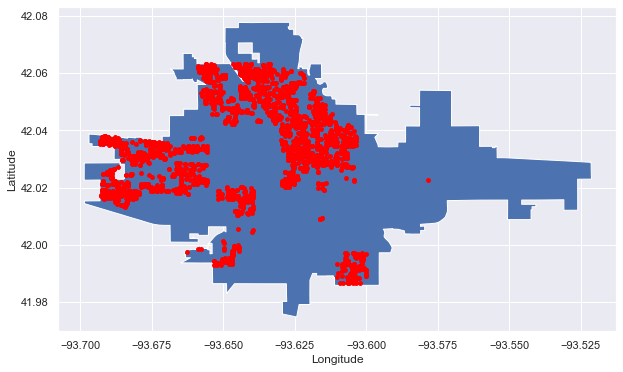

In [24]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(location_df['Longitude'], location_df['Latitude'])]
gdf = GeoDataFrame(location_df, geometry=geometry)   
city = gpd.read_file('tl_2022_19_place')

gdf.plot(ax=city.query("NAME == 'Ames'").plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [6]:
price_df = pd.merge(housing, location_df, on='PID')
price_df

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr,location,Latitude,Longitude,geometry
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,0,3,2010,WD,Normal,"436 HAYWARD AVE, Ames, USA","436, Hayward Avenue, Union Drive, Ames, Story ...",42.018564,-93.651619,POINT (-93.65162 42.01856)
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,2,2009,WD,Normal,"3416 WEST ST, Ames, USA","3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,POINT (-93.66367 42.02486)
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,11,2007,WD,Normal,"320 S 2ND ST, Ames, USA","320, South 2nd Street, Ames, Story County, Iow...",42.021548,-93.614068,POINT (-93.61407 42.02155)
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,0,5,2009,WD,Normal,"1524 DOUGLAS AVE, Ames, USA","1524, Douglas Avenue, Edgewood Park, Ames, Sto...",42.037391,-93.612207,POINT (-93.61221 42.03739)
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,11,2009,WD,Normal,"2304 FILLMORE AVE, Ames, USA","2304, Fillmore Avenue, Allenview, Ames, Story ...",42.044554,-93.631818,POINT (-93.63182 42.04455)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,0,5,2009,WD,Normal,"1021 RIDGEWOOD AVE, Ames, USA","1021, Ridgewood Avenue, Ridgewood, Ames, Story...",42.032102,-93.626373,POINT (-93.62637 42.03210)
2508,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,6,2009,WD,Normal,"3619 MARY CIR, Ames, USA","3619, Mary Circle, Ames, Story County, Iowa, 5...",42.027669,-93.666138,POINT (-93.66614 42.02767)
2509,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,8,2007,WD,Normal,"2140 SUNSET DR 2142, Ames, USA","2140, Sunset Drive, Greekland, Ames, Story Cou...",42.020129,-93.643832,POINT (-93.64383 42.02013)
2510,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,7,2007,WD,Normal,"5319 CLEMENS BLVD, Ames, USA","5319, Clemens Boulevard, Bentwood, Ames, Story...",42.016802,-93.689748,POINT (-93.68975 42.01680)


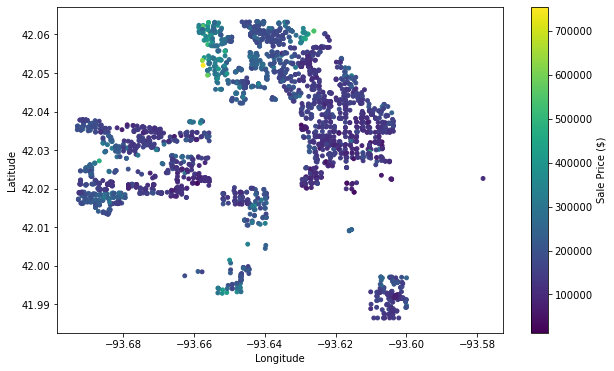

In [7]:
plt.figure(figsize=(10, 6))
plot = plt.scatter(x = price_df['Longitude'], y = price_df['Latitude'], c=price_df['SalePrice'], 
                   s=15, cmap='viridis')

plt.colorbar(plot, label='Sale Price ($)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [8]:
new_df = price_df[['PID', 'Latitude', 'Longitude', 'SalePrice', 'Neighborhood']]
new_df['crime_rate'] = 'any'
new_df['school_quality'] = 'any'

In [ ]:
# can better visualize price levels if break sale price range to low, medium and high
# new_df['price_level'] = 'any'
# for i, val in enumerate(new_df['SalePrice']):
#     if val <= 200000:
#         new_df['price_level'][i] = 0
#     elif val <= 400000 and val > 200000:
#         new_df['price_level'][i] = 1
#     else:
#         new_df['price_level'][i] = 2
# plt.figure(figsize=(10, 6))
# plt.scatter(x = new_df['Longitude'], y = new_df['Latitude'], c=new_df['price_level'], s=15, cmap='viridis')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

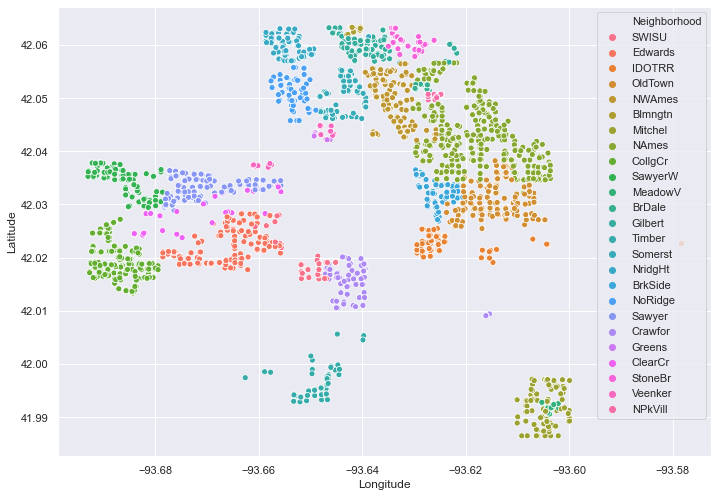

In [12]:
import seaborn as sns
sns.scatterplot(x = new_df['Longitude'], y = new_df['Latitude'], hue=new_df['Neighborhood'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

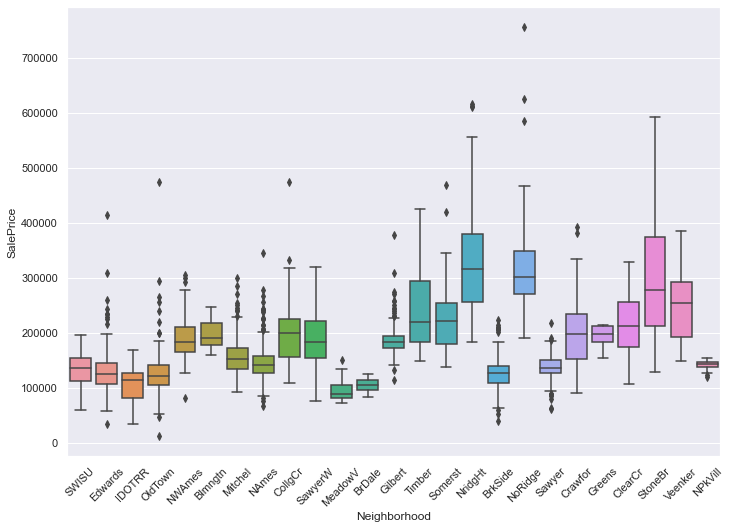

In [13]:
sns.boxplot(x = new_df['Neighborhood'],
            y = new_df['SalePrice'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45)
plt.show()

In [14]:
# adding more neighborhood features/info: crime rate for each neighborhood (Safe:10, Dangerous:0)
# info from https://www.neighborhoodscout.com/ia/ames/schools
for i, val in enumerate(new_df['Neighborhood']):
    if val == 'Greens' or val == 'NoRidge' or val == 'Somerst' or val == 'Veenker':
        new_df['crime_rate'][i] = 6
    elif val == 'Blmngtn' or val == 'Crawfor' or val == 'Gilbert' or val == 'NridgHt' or val == 'SWISU' or val == 'Sawyer' or val == 'SawyerW' or val == 'StoneBr':
        new_df['crime_rate'][i] = 5
    elif val == 'MeadowV' or val == 'Mitchel' or val == 'Timber':
        new_df['crime_rate'][i] = 3
    elif val == 'NAmes' or val == 'NPkVill' or val == 'NWAmes' or val == 'BrDale' or val == 'CollgCr' or val == 'Edwards':
        new_df['crime_rate'][i] = 1
    elif val == 'BrkSide' or val == 'ClearCr' or val == 'IDOTRR' or val == 'OldTown':
        new_df['crime_rate'][i] = 0

In [15]:
# add more neighborhood features/info: school quality in each neighborhood (Best:10, Poor:0)
for i, val in enumerate(new_df['Neighborhood']):
    if val == 'Blmngtn' or val == 'Gilbert' or val == 'NridgHt' or val == 'StoneBr':
        new_df['school_quality'][i] = 10
    elif val == 'Greens' or val == 'NoRidge' or val == 'Somerst' or val == 'Veenker':
        new_df['school_quality'][i] = 7
    elif val == 'MeadowV' or val == 'Mitchel' or val == 'Timber'or val == 'IDOTRR' or val == 'BrDale' or val == 'NPkVill' or val == 'NWAmes' :
        new_df['school_quality'][i] = 6
    elif val == 'NAmes' or val == 'BrkSide' or val == 'OldTown':
        new_df['school_quality'][i] = 5
    elif val == 'ClearCr' or val == 'Edwards':
        new_df['school_quality'][i] = 4
    elif val == 'CollgCr':
        new_df['school_quality'][i] = 3
    elif val == 'Crawfor' or val == 'SWISU' or val == 'Sawyer' or val == 'SawyerW':
        new_df['school_quality'][i] = 2

In [16]:
# adding a feature: neighborhood score by adding crime rate and school quality score, the higher the score 
# the more valuable that neighborhood
new_df['neighborhood_score'] = new_df['crime_rate'] + new_df['school_quality']
new_df = new_df.sort_values('neighborhood_score', ascending=False)
new_df

,PID,Latitude,Longitude,SalePrice,Neighborhood,crime_rate,school_quality,neighborhood_score
1083,528106020,42.062092,-93.657509,555000,NridgHt,5,10,15
2137,528250100,42.060198,-93.641194,180000,Gilbert,5,10,15
707,528118040,42.060428,-93.657496,418000,NridgHt,5,10,15
711,528120030,42.061254,-93.654293,335000,NridgHt,5,10,15
1553,528240060,42.060250,-93.641427,184100,Gilbert,5,10,15
...,...,...,...,...,...,...,...,...
1540,907201060,42.021226,-93.686884,149900,CollgCr,1,3,4
720,907175030,42.018169,-93.691740,235000,CollgCr,1,3,4
2210,907255030,42.017701,-93.685603,274000,CollgCr,1,3,4
1557,907401090,42.014143,-93.687064,232000,CollgCr,1,3,4


In [18]:
# save to csv
# new_df.to_csv("Ames_neighborhood.csv", index=False)